In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, adjusted_rand_score
from scipy.stats import mode
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
df = pd.read_csv(r'c:\Users\PC\Downloads\breast+cancer+wisconsin+diagnostic\wdbc.data')
print(df.head())
print('Nguyễn Thị Tường Vi - 6351071077')

     842302  M  17.99  10.38   122.8    1001   0.1184   0.2776  0.3001  \
0    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
1  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
2  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
3  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   
4    843786  M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.1578   

    0.1471  ...  25.38  17.33   184.6    2019  0.1622  0.6656  0.7119  0.2654  \
0  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
1  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
2  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
3  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   
4  0.08089  ...  15.47  23.75  103.40   741.6  0.1791  0.5249  0.5355  0.1741   

   0.4601   0.1189  
0  0.2750  0.08902  
1  0.3613  0.08758  
2  0.

In [ ]:
column_names = ['ID', 'diagnosis'] + [f'feature_{i}' for i in range(1,31)]
data.columns = column_names


In [22]:
X = data.iloc[:, 2:]   
y_true = data['diagnosis'].map({'B':0, 'M':1}).values  # nhãn 0=Benign, 1=Malignant


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)


In [24]:
k = 2  
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)


In [25]:
from scipy.stats import mode
labels = np.zeros_like(y_pred)
for i in range(k):
    mask = (y_pred == i)
    labels[mask] = mode(y_true[mask])[0]


In [26]:
acc = accuracy_score(y_true, labels)
ari = adjusted_rand_score(y_true, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Adjusted Rand Index (ARI): {ari:.4f}")


Accuracy: 0.9120
Adjusted Rand Index (ARI): 0.6759


Nguyễn Thị Tường Vi - 6351071077


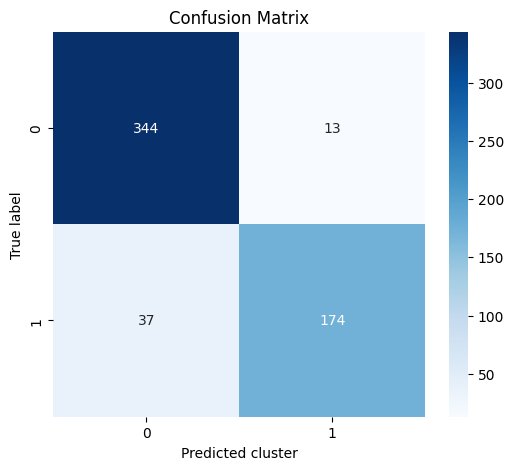

In [28]:
print('Nguyễn Thị Tường Vi - 6351071077')
cm = confusion_matrix(y_true, labels)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted cluster')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()
